<a href="https://colab.research.google.com/github/GandaKen/myprojects/blob/master/Data_Visualization_Using_Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [0]:
#Import the Data
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  2008k      0 --:--:-- --:--:-- --:--:-- 2006k


In [0]:
#Create a dataframe
flights= pd.read_csv('flightdata.csv', index_col=0)
flights.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,
2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [0]:
# Print all the columns as array
flights.columns.array

<PandasArray>
[            'QUARTER',               'MONTH',        'DAY_OF_MONTH',
         'DAY_OF_WEEK',      'UNIQUE_CARRIER',            'TAIL_NUM',
              'FL_NUM',   'ORIGIN_AIRPORT_ID',              'ORIGIN',
     'DEST_AIRPORT_ID',                'DEST',        'CRS_DEP_TIME',
            'DEP_TIME',           'DEP_DELAY',           'DEP_DEL15',
        'CRS_ARR_TIME',            'ARR_TIME',           'ARR_DELAY',
           'ARR_DEL15',           'CANCELLED',            'DIVERTED',
    'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',            'DISTANCE',
         'Unnamed: 25']
Length: 25, dtype: object

In [0]:
#Print the Delay column
flights.ARR_DELAY

YEAR
2016   -41.0
2016     4.0
2016   -33.0
2016    10.0
2016     8.0
        ... 
2016   -35.0
2016    14.0
2016   -16.0
2016    -5.0
2016   -12.0
Name: ARR_DELAY, Length: 11231, dtype: float64

In [0]:
#Summary Statistics of the delay flights
flights.ARR_DELAY.describe()

count    11043.000000
mean        -2.573123
std         39.232521
min        -67.000000
25%        -19.000000
50%        -10.000000
75%          1.000000
max        615.000000
Name: ARR_DELAY, dtype: float64

In [0]:
arr_hist, edges = np.histogram(flights['ARR_DELAY'], 
                               bins = int(180/5), 
                               range = [-60, 120])
# Put the information in a dataframe
delays = pd.DataFrame({'ARR_DELAY': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [0]:
#Views delays
delays

,ARR_DELAY,left,right
0,2,-60.0,-55.0
1,11,-55.0,-50.0
2,32,-50.0,-45.0
3,72,-45.0,-40.0
4,158,-40.0,-35.0
5,323,-35.0,-30.0
6,637,-30.0,-25.0
7,1142,-25.0,-20.0
8,1585,-20.0,-15.0
9,1502,-15.0,-10.0


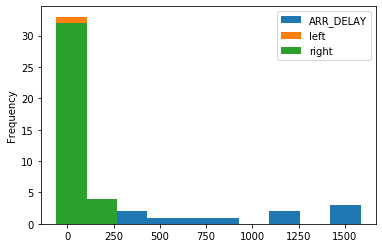

In [0]:
#Create a Histogram of the delayed arrivals
delays.plot.hist()

In [0]:
#install bokeh
!pip install bokeh

In [0]:
# bokeh basics
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [0]:
output_notebook

<function bokeh.io.output.output_notebook>

In [0]:
# Create the blank plot
p = figure(plot_height = 500, plot_width = 500, 
           title = 'Histogram of Arrival Delays',
           x_axis_label = 'Delays (min)]', 
           y_axis_label = 'Number of Flights')

In [0]:
# Add a quad glyph
p.quad(bottom=0, top= delays['ARR_DELAY'], 
       left=delays['left'], 
       right=delays['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

In [0]:
#import ColumnDataSource
from bokeh.models import ColumnDataSource


#Convert dataframe to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['index', 'ARR_DELAY', 'left', 'right', 'f_interval'])

In [0]:
#Add quad glyph using source
p.quad(source= src, 
       bottom = 0,
       top = 'ARR_DELAY',
       left='left', 
       right='right', 
       fill_color='red', 
       line_color='black')

GlyphRenderer(id='1236', ...)

In [0]:
#import HooverTool
from bokeh.models import HoverTool

# Hover tool referring to  data field using @ and a position on the graph using $
h = HoverTool(tooltips = [('Delay Interval Left ', '@left'),
                          ('(x,y)', '($x, $y)')])

In [0]:
# Add a column showing the extent of each interval
delays['f_interval'] = ['%d to %d minutes' 
                        % (left, right) for left, 
                        right in zip(delays['left'], 
                        delays['right'])]